# **From Biological to Artificial Neurons**
 ## Introduction
   Artificial Neural Networks (ANNs)  have been around for quite a while: they were first
  introduced back in 1943 by the neurophysiologist Warren McCulloch and the
  mathematician Walter Pitts. In their landmark paper “A Logical Calculus of
  Ideas Immanent in Nervous Activity”
 ## Progress of Neural networks
  * Early successes of ANNs made us believe that we will be dealing with truly intelligent machines
  * In the 1960s this promise went unfulfilled for quite a while
  * In the early 1980s new architectures were invented and better training techniques were developed but the process was slow
  * By the 1990s other models were invented and seemed to make better results than ANNs
  * Now there is another wave of interest in ANNs due to the avilability of data, the increase in computing power, the improved training alogrithms, etc...
 ## Biological Neurons
 Biological neurons are specialized cells found in animal brains, consisting of a cell body with a nucleus, dendrites, and a long axon that splits into telodendria with synaptic terminals at their tips. These neurons communicate via electrical impulses called action potentials, which travel along the axon and trigger the release of neurotransmitters at synapses.

 Biological neurons are brain cells that work together in huge networks. Even though each neuron is simple, their connections allow the brain to perform complex tasks, like how ants work together to build an anthill. Scientists are still studying how these networks are organized, but they’ve already mapped some parts of the brain, showing how powerful and intricate these systems are.

## Logical Computations with Neurons
### Artificial neuron
it has one or more binary
 inputs and one binary output. The artificial neuron activates its
 output when more than a certain number of its inputs are active.
### Simple Logic
Neurons can be used to perform simple logic operations like AND, OR, and NOT.
* Identity Function: If a neuron gets activated, it activates the next neuron.
* AND Gate: The output neuron activates only if both input neurons are active.
* OR Gate: The output neuron activates if at least one input neuron is active.
* NOT Gate: An inhibitory connection can turn a neuron off when another is on.
## The Perceptron
it was invented by Frank Rosenblatt in 1957, is a simple neural network model that uses weights and a bias to process inputs and produce an output based on a step function.
* **Linear Combination**: $$z = \mathbf{w}^\top \mathbf{x} + b$$
* **Step Function**: $$h(x) = \text{step}(z)$$
The perceptron uses the Heaviside step function or the sign function for binary classification. A single TLU computes a linear function of its inputs and outputs a class based on a threshold. A perceptron consists of one or more TLUs in a fully connected layer, with inputs forming the input layer and TLUs forming the output layer.
* **Heaviside Step Function**:
   $$\text{heaviside}(z) = \begin{cases}
   0 & \text{if } z < 0 \\
   1 & \text{if } z \geq 0
   \end{cases}$$
* **Sign Function**:
   $$\text{sgn}(z) = \begin{cases}
   -1 & \text{if } z < 0 \\
   0 & \text{if } z = 0 \\
   +1 & \text{if } z > 0
   \end{cases}$$
  
 A perceptron is composed of one or more TLUs organized in a single layer,
 where every TLU is connected to every input. Such a layer is called a fully
 connected layer, or a dense layer. The inputs represent the input layer. And
 since the layer of TLUs produces the final outputs, it is called the output
 layer.

 This equation can be used to calculate the outputs of a layer of artificial neurons for several instances at once:
 $$h_{W,b}(X) = \phi(XW + b)$$


### **Perceptron Training**  

The perceptron is trained using a rule inspired by Hebb’s rule, which strengthens connections based on activation. The perceptron learning rule updates weights based on prediction errors:  

#### **Perceptron Learning Rule**  

$$
w_{i,j}^{(next)} = w_{i,j} + \eta (y_j - \hat{y}_j) x_i
$$

### **Perceptron in Scikit-Learn**  
```python
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0)

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new)
```

### **Limitations**  
- Works only for linearly separable problems.  
- Fails on nonlinear problems like XOR.  

But luckily it was later proved that stacking multiple perceptrons can fix the XOR problem, This was later called Multi Layer Perceptron (MLP)

##  The Multilayer Perceptron and Backpropagation
 An MLP is composed of one input layer, one or more layers of TLUs called
 hidden layers, and one final layer of TLUs called the output layer.

 When an ANN contains a deep stack of hidden layers,  it is called a deep
 neural network (DNN).

 For many years researchers were trying to find a way to train MLPs and there was an idea of using gradient descent but it was later found to be ineffective since it wasn't clear how much time it will take with so many parameters in the MLPs.
 ### Reverse-mode automatic differentiation
 In just two passes
 through the network (one forward, one backward), it is able to compute the
 gradients of the neural network’s error with regard to every single model
 parameter, which can then be used to perform a gradient descent step and by repeating this the error will eventually drop to the minimum and this is now called backpropagation (or backprop for short).

 ### **Backprobagation**
 #### 1. Mini Batch Processing  
- Processes one mini-batch at a time.  
- Iterates through the full training set multiple times.  

#### 2. Forward Pass  
- The mini batch enters through the input layer.  
- Each layer computes outputs and passes them forward.  
- The final output layer produces predictions.  
- Intermediate values are stored for the backward pass.  

#### 3. Loss Calculation  
- A loss function measures the difference between predicted and actual outputs.  

#### 4. Backward Pass (Error Propagation)  
- Calculates how much each weight and bias contributed to the error using the chain rule.  
- Propagates the error gradients backward through the network, layer by layer.  

#### 5. Gradient Descent Update  
- Updates weights and biases using computed gradients.  
- Reduces error and improves performance over multiple iterations.

### **Activation Functions**
The step function was replaced by the sigmoid function allowing the gradient decsent to make progress in every step, there are also some other commonly used functions such as: The hyperbolic tangent function and  The rectified linear unit function.


## **Regression MLPs**
MLPs can be used for regression tasks. If you want to predict a single
 value then you just
 need a single output neuron, you need one output
 neuron per output dimension
## **Classification MLPs**
- Binary Classification: One output neuron with sigmoid activation to predict the probability of the positive class.  
- Multilabel Classification: Multiple output neurons, each using sigmoid activation. Probabilities do not sum to 1.  
- Multiclass Classification: One output neuron per class, using softmax activation to ensure probabilities sum to 1.  
- Loss Function:Cross-entropy loss is typically used for classification tasks.  

In [35]:
# Building an Image Classifier Using the Sequential API
import tensorflow as tf
import pandas as pd

In [36]:
#Loading the Dataset
from sklearn.datasets import fetch_openml
mnist = tf.keras.datasets.mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [37]:
#Checking the shape of the image
X_train.shape

(55000, 28, 28)

In [38]:
#Checking the datatype of training set
X_train.dtype

dtype('uint8')

In [39]:
#Normalizing the pixel intensities and ranging them from 0 to 1
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [40]:
#Sets random seed for the hidden and output layers
#Making sequential API model using keras
#Building the first layer (input)
#We use flatten to convert the images into 1D arrays
#Then we add a dense hidden layer with 300 neurons and relu activation function
#We add a second dense hidden layer with 100 neurons and using relu activation function aswell
#Then we add a dense output layer with 10 neurons
model = tf.keras.Sequential([
tf.keras.layers.Flatten(input_shape=[28, 28]),
tf.keras.layers.Dense(300, activation="relu"),
tf.keras.layers.Dense(100, activation="relu"),
tf.keras.layers.Dense(10, activation="softmax")])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [41]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
#Checking the layers
model.layers

[<Flatten name=flatten_4, built=True>,
 <Dense name=dense_12, built=True>,
 <Dense name=dense_13, built=True>,
 <Dense name=dense_14, built=True>]

In [43]:
#Selecting layer 1 and checking its name
hidden1 = model.layers[1]
hidden1.name

'dense_12'

In [45]:
#Accessing by name
model.get_layer('dense_12') is hidden1

True

In [46]:
#Connection weights
weights, biases = hidden1.get_weights()
weights

array([[ 0.05691999,  0.07044467,  0.04415394, ...,  0.00702804,
        -0.00109316, -0.06517363],
       [-0.06009858, -0.01513594, -0.07276332, ..., -0.07017361,
         0.00722443, -0.03149768],
       [ 0.0187912 ,  0.05552287,  0.01110324, ..., -0.00996268,
         0.03355981,  0.01619292],
       ...,
       [ 0.06246504,  0.05063669,  0.03461643, ..., -0.00068098,
        -0.03516382,  0.02423894],
       [-0.06258617, -0.07400942,  0.06924836, ..., -0.02390747,
         0.06970184,  0.01863158],
       [ 0.03476296, -0.06386213,  0.05704671, ...,  0.06830224,
         0.05693305,  0.00692993]], dtype=float32)

In [47]:
weights.shape

(784, 300)

In [48]:
#Bias terms
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [49]:
biases.shape

(300,)

In [54]:
#Compiling the model using stochastic gradient descent
model.compile(loss="sparse_categorical_crossentropy",
optimizer="sgd",
metrics=["accuracy"])

In [55]:
#Now we train the model
history = model.fit(X_train, y_train, epochs=30,validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7146 - loss: 1.0650 - val_accuracy: 0.9306 - val_loss: 0.2613
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9126 - loss: 0.3103 - val_accuracy: 0.9450 - val_loss: 0.2011
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9305 - loss: 0.2469 - val_accuracy: 0.9552 - val_loss: 0.1702
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9408 - loss: 0.2083 - val_accuracy: 0.9616 - val_loss: 0.1490
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9487 - loss: 0.1802 - val_accuracy: 0.9654 - val_loss: 0.1335
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9555 - loss: 0.1585 - val_accuracy: 0.9694 - val_loss: 0.1220
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9602 - loss: 0.1413 - val_accuracy: 0.9706 - val_loss: 0.1129
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9648 - loss: 0.1270 

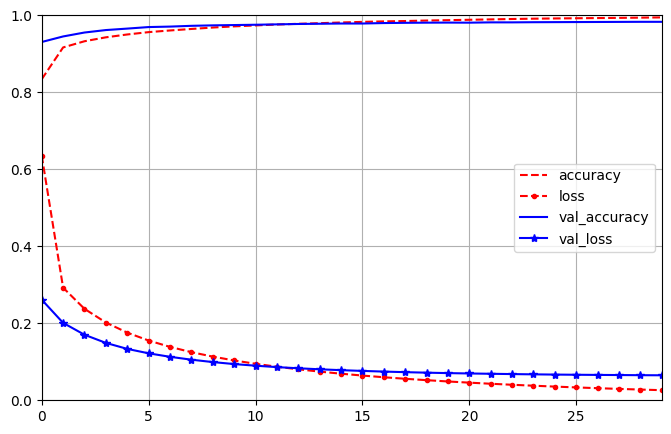

In [59]:
#Using pandas and plot to get learning curves
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, style=["r--", "r--.", "b-", "b-*"])
plt.show()

In [60]:
#Now we evaluate the test set
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9737 - loss: 0.0803


[0.06926797330379486, 0.9775000214576721]